In [1]:
from pathlib import Path
import pandas as pd

w_path = Path("C:\\Users\\David Carlyn\\Documents\\PCA_W_csv.csv")
df = pd.read_csv(w_path)
df.head()

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC471,PC472,PC473,PC474,PC475,PC476,PC477,PC478,PC479,PC480
0,1,5.453311e-18,-5.345927e-17,5.319238e-17,-8.245292e-18,-1.013248e-17,-2.648538e-17,-1.179557e-16,2.872685e-17,-5.157695e-17,...,-4.784260e-17,6.260682e-17,8.438761e-17,1.133413e-17,6.384977e-17,-2.837352e-16,8.668545e-16,1.041762e-16,2.738275e-16,0.082324
1,2,1.774336e-16,8.430753e-17,-5.926563e-18,-6.213084e-17,5.613875e-17,1.749486e-17,1.301783e-16,4.598565e-17,9.201245e-17,...,-2.416284e-16,-2.465469e-16,-2.519921e-16,2.434475e-16,-1.371047e-17,-1.804320e-16,-3.571420e-16,-2.743584e-16,-3.607482e-16,0.034054
2,3,-1.271387e-16,-1.523417e-16,1.527337e-16,-1.346073e-16,4.658585e-17,-4.377680e-17,-5.805372e-17,4.350889e-17,-6.112752e-17,...,-1.568706e-16,6.328786e-17,1.577724e-17,-1.854244e-16,-3.563530e-17,-3.570899e-16,2.281425e-16,2.049531e-16,2.514618e-16,0.074330
3,4,2.124667e-16,9.458438e-17,3.009931e-16,-3.360329e-16,-2.534498e-17,5.706004e-17,1.000267e-16,1.082752e-16,3.294125e-17,...,-2.762120e-16,6.100066e-17,8.044623e-17,4.104964e-17,4.214357e-17,2.878848e-17,3.853604e-16,-4.007415e-16,3.147656e-17,0.497119
4,5,4.807344e-17,1.764693e-17,-7.051037e-17,3.753536e-17,6.673416e-17,3.351844e-17,-4.277929e-17,9.498165e-17,-1.148978e-16,...,5.665132e-17,-1.778310e-16,6.604482e-19,2.996130e-17,4.101855e-17,-1.909331e-16,8.046336e-16,-8.728560e-17,9.353219e-17,-0.109059


In [2]:
loading_path = Path("C:\\Users\\David Carlyn\\Downloads\\PCA_color_3_loadings.csv")
loadings_df = pd.read_csv(loading_path)
pca_loading_ex = loadings_df.iloc[:, 1:].to_numpy()
pca_loading_ex = pca_loading_ex[:1]
pca_loading_ex.shape

(1, 480)

In [3]:
pca_w = df.to_numpy()[:, 1:]
pca_w.shape

(90000, 480)

In [4]:
import numpy as np
90000/3

np.sqrt(30000)

np.float64(173.20508075688772)

In [5]:
pca_loading_ex[0, 0]

np.float64(-20.9701920357872)

In [6]:
from matplotlib import pyplot as plt

def show_img(ex_loading):
    img = pca_w @ ex_loading.T
    img = img.reshape(300, 300)
    plt.imshow(img, vmin=-1, vmax=1)
    plt.show()


In [7]:
def show_img_edits(ex_loadings, idx, edits):
    fig, axs = plt.subplots(1, len(edits)+1)
    img = pca_w @ ex_loadings.T
    img = img.reshape(300, 300)
    axs[0].imshow(img, vmin=-1, vmax=1)
    axs[0].set_title(f"Original: {round(ex_loadings[0, idx], 2)}")
    for i, edit in enumerate(edits):
        ex_copy = np.copy(ex_loadings)
        ex_copy[0, idx] = edit
        img = pca_w @ ex_copy.T
        img = img.reshape(300, 300)
        axs[i+1].imshow(img, vmin=-1, vmax=1)
        axs[i+1].set_title(f"Edit: {edit}")
    plt.show()

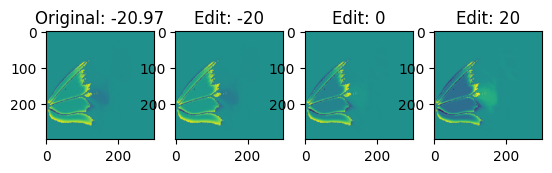

In [8]:
show_img_edits(pca_loading_ex, idx=0, edits=[-20, 0, 20])

In [ ]:
def show_img_edits_movie(ex_loadings, idx, edits):
    fig, ax = plt.subplots(1, 1)
    imgs = []
    img = pca_w @ ex_loadings.T
    img = img.reshape(300, 300)
    imgs.append(img)
    for i, edit in enumerate(edits):
        ex_copy = np.copy(ex_loadings)
        ex_copy[0, idx] = edit
        img = pca_w @ ex_copy.T
        img = img.reshape(300, 300)
        imgs.append(img)
    
    plt.ion() # Turns interactive mode on (probably unnecessary)
    fig.show() # Initially shows the figure
    for im in imgs:
        ax.clear() # Clears the previous image
        ax.imshow(im, vmin=-1, vmax=1) # Loads the new image
        plt.pause(.1) # Delay in seconds
        fig.canvas.draw() # Draws the image to the screen

C:\Users\David Carlyn\AppData\Local\Temp\ipykernel_22480\153695610.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show() # Initially shows the figure


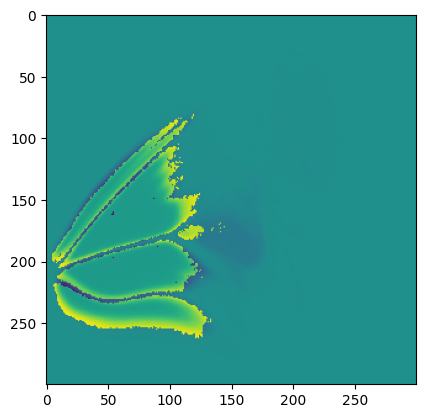

In [10]:
show_img_edits_movie(pca_loading_ex, idx=0, edits=[-20, 0, 20])

In [19]:
from matplotlib import pyplot as plt

def show_img_edit(ex_loading, idx, edit):
    ex_copy = np.copy(ex_loading)
    ex_copy[0, idx] = edit
    img = pca_w @ ex_copy.T
    img = img.reshape(300, 300)
    plt.imshow(img, vmin=-1, vmax=1)
    plt.colorbar()

In [20]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random

def show_img_edit_interact(idx, edit):
    show_img_edit(pca_loading_ex, idx=idx, edit=edit)

interact(show_img_edit_interact, idx=[0, 1, 2, 3], edit=(-30,30,1))

interactive(children=(Dropdown(description='idx', options=(0, 1, 2, 3), value=0), IntSlider(value=0, descripti…

<function __main__.show_img_edit_interact(idx, edit)>